# KNN

In [7]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=15)

# Train classifier
knn.fit(X, y)

# Make predictions
y_pred = knn.predict(X)

# Evaluate accuracy
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.99


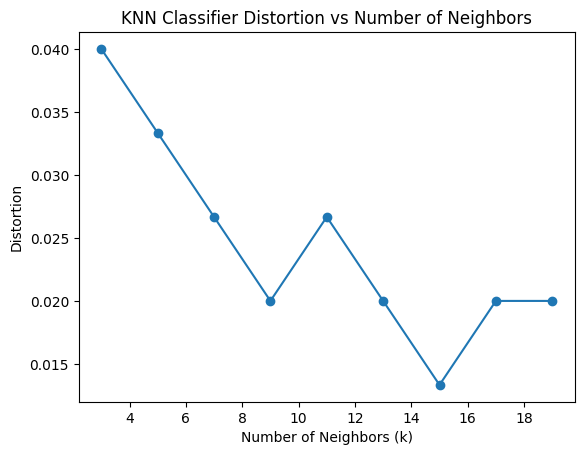

In [6]:
import matplotlib.pyplot as plt

distortions = []
for i in range(3, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    distortion = 1 - accuracy_score(y, y_pred)
    distortions.append(distortion)


plt.plot(range(3, 20, 2), distortions, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Distortion')
plt.title('KNN Classifier Distortion vs Number of Neighbors')
plt.show()

# Titanic Dataset

In [9]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/titanic-dataset")

print("Path to dataset files:", path)

/home/iadel/miniconda3/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 22.0k/22.0k [00:00<00:00, 1.04MB/s]

Extracting files...
Path to dataset files: /home/iadel/.cache/kagglehub/datasets/yasserh/titanic-dataset/versions/1


In [10]:
import pandas as pd

# Load Titanic dataset
titanic_data = pd.read_csv(f"{path}/Titanic-Dataset.csv")
print(titanic_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [19]:
Y = titanic_data['Survived']
X = titanic_data.drop(columns=['Survived', 'Name', 'PassengerId', 'Cabin', 'Ticket'])

print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB
None


In [23]:
# Handle categorical data
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

print(X['Sex'].unique())
X['Sex'] = le.fit_transform(X['Sex'])
print(X['Sex'].unique())


print(X['Embarked'].unique())
print(X['Embarked'].value_counts())
X['Embarked'] = X['Embarked'].fillna('S')
X['Embarked'] = le.fit_transform(X['Embarked'])
print(X['Embarked'].unique())

[1 0]
[1 0]
['S' 'C' 'Q' nan]
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
[2 0 1]


In [24]:
# Handle missing values of Age
print(X['Age'].isnull().sum())
X['Age'] = X['Age'].fillna(X['Age'].mean())
print(X['Age'].isnull().sum())

177
0


In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


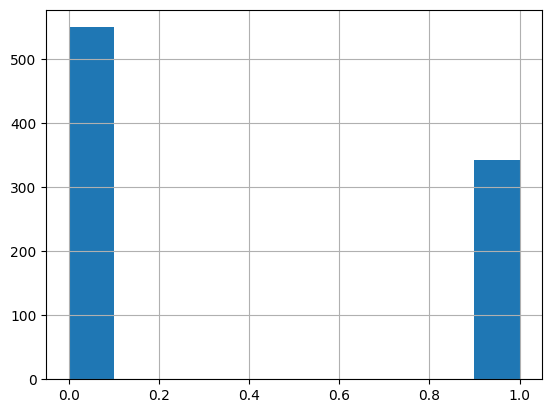

In [33]:
Y.hist()
plt.show()

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(712, 7) (179, 7) (712,) (179,)


In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Test Accuracy: {accuracy:.2f}")


Test Accuracy: 0.73


Logistic Regression Test Accuracy: 0.80


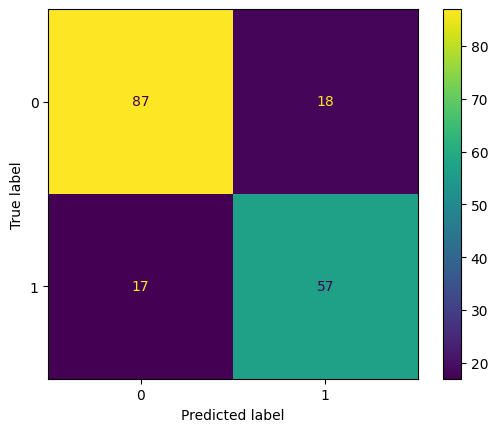

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

logreg = LogisticRegression(max_iter=500, class_weight= {0:0.8, 1:1.0})
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Logistic Regression Test Accuracy: {accuracy:.2f}")

cm = confusion_matrix(Y_test, Y_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()
plt.show()

